# Imports and def of practical functions

In [1]:
import PIL.Image as im
import numpy as np
import matplotlib.pyplot as plt
from itertools import permutations
import random as rd
from tqdm import tqdm
import time

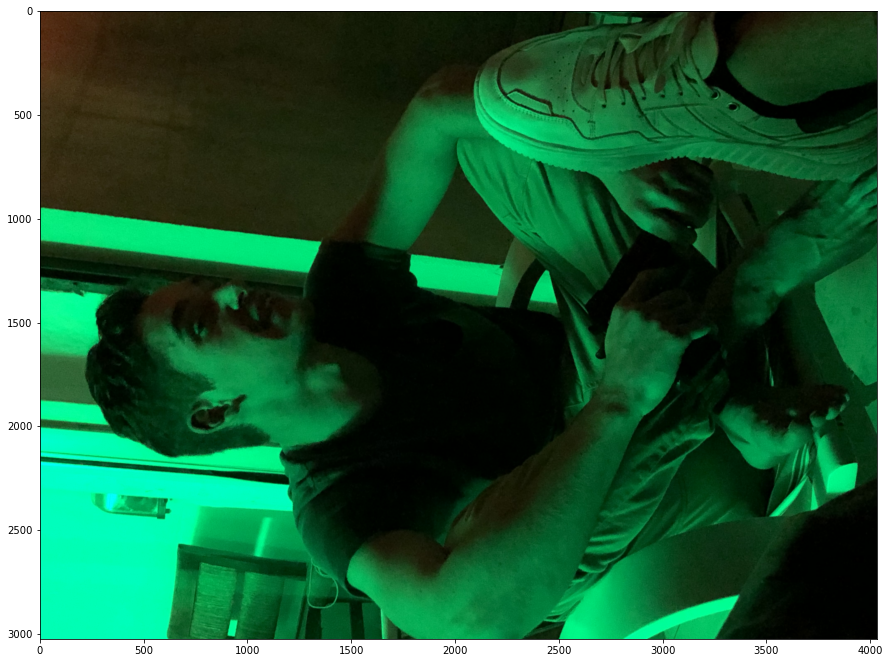

In [2]:
start = time.time()

nessi = np.array(im.open('coco.png'))

n,m,useless = np.shape(nessi)
def show(data, r = 1, unique = True):
    if unique:
        plt.figure(r, figsize=(n//200, m//200))
        plt.imshow(data)
    else:
        l = len(data)
        plt.figure(r, figsize=(n//200, m//200))
        for i in range(l):
            plt.subplot(int(str(1)+str(l)+str(i+1)))
            print(np.shape(data[i]))
            plt.imshow(data[i])
show(nessi)

In [3]:
(n,m)

(3024, 4032)

# Division of the image

In [4]:
n_larg = 3
n_long = 3

long = n//n_long
larg = m//n_larg

arrays=[]
for i in range(n_long):
    for j in range(n_larg):
        arrays.append(nessi[i*long:(i+1)*long,j%n_larg*larg:(j%n_larg+1)*larg])

for i,ar in enumerate(arrays):
    print(np.shape(ar))

(1008, 1344, 3)
(1008, 1344, 3)
(1008, 1344, 3)
(1008, 1344, 3)
(1008, 1344, 3)
(1008, 1344, 3)
(1008, 1344, 3)
(1008, 1344, 3)
(1008, 1344, 3)


In [5]:
np.shape(arrays[0])

(1008, 1344, 3)

In [6]:
arrays_after = []
arrays_before = []
#arrays_before = list(np.copy(np.asarray(arrays)))
#arrays_after = np.copy(arrays)

liste1 = [k for k in range(n_larg*n_long)]
liste2 = [k for k in range(n_larg*n_long)]
rd.shuffle(liste1)
for i in range(len(liste1)):
    arrays_after.append(arrays[liste1[i]])
    arrays_before.append(arrays[liste2[i]])
    
arrays_after = np.asarray(arrays_after)

#rd.shuffle(arrays_after)
#print(unique(list(arrays_after)))

# The image is now shuffled

(3024, 4032, 3)
(3024, 4032, 3)


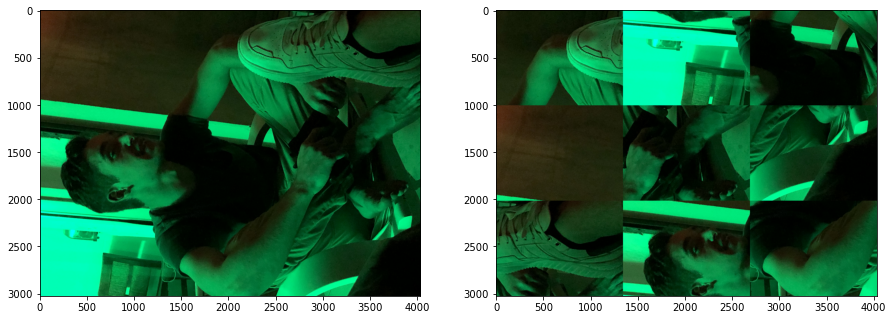

In [7]:
L_before=[]
for i in range(n_long):
    hor = arrays[n_larg*i]
    for j in range(1,n_larg):
        hor = np.hstack([hor,arrays_before[n_larg*i+j]])
    L_before.append(hor)
res_before = np.vstack(L_before)


L_after=[]
for i in range(n_long):
    hor = arrays_after[n_larg*i]
    for j in range(1,n_larg):
        hor = np.hstack([hor,arrays_after[n_larg*i+j]])
    L_after.append(hor)
res_after = np.vstack(L_after)

show([res_before,res_after],unique = False)

In [8]:
indexes = [k for k in range(n_larg*n_long)]
i_pos = list(permutations(indexes,n_larg*n_long))

# Discontinuities calculations

In [9]:
def get_discontinuities(im1,im2,where1,where2):
    if where1 == 'L' and where2 == 'R':
        return abs(im1[:,-1].astype('int')-im2[:,0].astype('int')).sum()
    if where1 == 'R' and where2 == 'L':
        return abs(im2[:,-1].astype('int')-im1[:,0].astype('int')).sum()
    if where1 == 'T' and where2 == 'B':
        return abs(im1[-1,:].astype('int')-im2[0,:].astype('int')).sum()
    if where1 == 'B' and where2 == 'T':
        return abs(im1[-1,:].astype('int')-im2[0,:].astype('int')).sum()

def total_continuities(arrays,combi):
    c = 0
    count = 0
    L = []
    for i in range(n_long):
        for j in range(n_larg):
            if j!=0: c += get_discontinuities(arrays[combi[i*n_larg+j-1]],arrays[combi[i*n_larg+j]],'L','R')
            if i!=0: c += get_discontinuities(arrays[combi[(i-1)*n_larg+j]],arrays[combi[i*n_larg+j]],'T','B')
    return c

# Finding the good combination

In [10]:
discs = []
for combi in tqdm(i_pos):
    discs.append(total_continuities(arrays_after,combi))

100%|█████████████████████████████████| 362880/362880 [01:12<00:00, 5010.80it/s]


Temps d'exécution : 7.6e+01ms


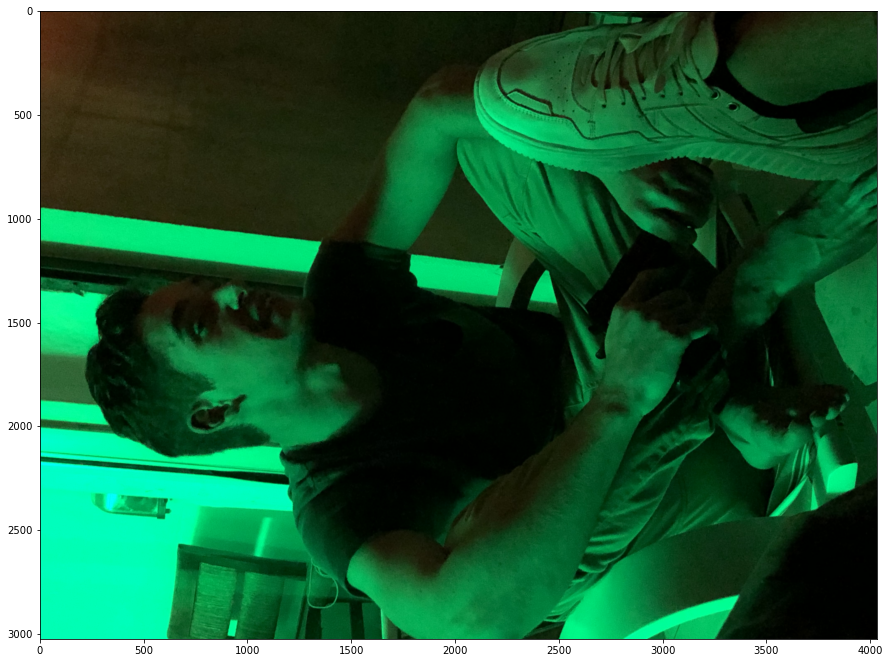

In [11]:
combi_min = discs.index(min(discs))

L=[]
for i in range(n_long):
    hor = arrays_after[i_pos[combi_min][n_larg*i]]
    for j in range(1,n_larg):
        hor = np.hstack([hor,arrays_after[i_pos[combi_min][n_larg*i+j]]])
    L.append(hor)
res = np.vstack(L)
show(res,2)

end = time.time()
elapsed = end - start

print(f'Temps d\'exécution : {elapsed:.2}ms')

# We retreive the original image!